# Week 04 Assignment weather data

Welcome to week four of this course programming 1. You will to organise your data into the required format and apply smoothing. In this assignment we will work with weatherdata from the KNMI. A subset of weatherdata is for you available in the file: `KNMI_20181231.csv`. The data consist of several stations with daily weather data of several years. Your task is to make a plot similar to the plot below.


<img src="https://github.com/callmesukhi/BFVM19PROG1/blob/main/assessments/images/weather.png?raw=1" alt="drawing" width="400"/>


Furthermore the plot needs the following enhancements

1. proper titles and ticks
2. a slider widget selecting a particular year or all years
3. lines need to be smoothed
3. legends needs to be added

Use your creativity. Consider colors, alpha settings, sizes etc. 

Learning outcomes

- load, inspect and clean a dataset 
- reformat dataframes
- apply smoothing technologies
- visualize timeseries data

The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: clean the data](#1)
- [part 3: reformat data](#2)
- [part 4: smooth the data](#3)
- [part 5: visualize the data](#4)
- [part 6: Challenge](#5)

Part 1 and 5 are mandatory, part 6 is optional (bonus)
To pass the assingnment you need to a score of 60%. 


---

<a name='0'></a>
## Part 1: Load the data

Either load the dataset `KNMI_20181231.csv` or `KNMI_20181231.txt.tsv`. The dataheaders contain spaces and are not very self explainable. Change this into more readable ones. Select data from station 270. Select only the mean, minimum and maximum temperature. The data should look something like this:


In [ ]:
import pandas as pd
import numpy as np
import yaml

In [ ]:
df = pd.read_csv('data/KNMI_20181231.txt.tsv', sep=',', skiprows=63, parse_dates=['YYYYMMDD'])
df = df.drop(df.index[0])
df.rename(columns={"# STN":"STATION", "YYYYMMDD":"DATE", "   TG":"Tmean", "   TN":"Tmin", "   TX":"Tmax"}, inplace=True)
df = df.drop(['   SQ', '   DR', '   RH'], axis='columns')
df = df[df.STATION == 270]
df = df.reset_index(drop=True)
print(df.info())
df.head()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (0,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  6940 non-null   object        
 1   DATE     6940 non-null   datetime64[ns]
 2   Tmean    6940 non-null   object        
 3   Tmin     6940 non-null   object        
 4   Tmax     6940 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 271.2+ KB
None


,STATION,DATE,Tmean,Tmin,Tmax
0,270,2000-01-01,42,-4,79
1,270,2000-01-02,55,33,74
2,270,2000-01-03,74,49,89
3,270,2000-01-04,46,22,75
4,270,2000-01-05,41,14,56


        station      Date  Tmean   Tmin   Tmax
245205      270  19510101      0    -40     24
245206      270  19510102      9     -5     19
245207      270  19510103      5     -8     17
245208      270  19510104      5    -15     17
245209      270  19510105     26      6     46

---

<a name='1'></a>
## Part 2: Clean the data

The data ia not clean. There are empty cells in the dataframe which needs to be replaced with NaN's and the temperature is in centidegrees which needs to be transformed into degrees. The date field needs a datetime format. For visualization convience we would like to remove the leap year. Conduct the cleaning.

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
#replace cells with spaces to NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
print(color.BOLD + color.UNDERLINE + "Replaced all the empty spaces with NaNs:" + color.END)
print(df.isna().sum())
print("\n")
# #change data formats
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['STATION'] = pd.to_numeric(df['STATION'], errors='coerce').astype('int')
df['Tmean'] = pd.to_numeric(df['Tmean'], errors='coerce')
df['Tmin'] = pd.to_numeric(df['Tmin'], errors='coerce')
df['Tmax'] = pd.to_numeric(df['Tmax'], errors='coerce')
# #change temperatures to celcius degrees
df['Tmean'] = df['Tmean'] / 10
df['Tmin'] = df['Tmin'] / 10
df['Tmax'] = df['Tmax'] / 10
# #remove leap 
df = df[~((df['DATE'].dt.month == 2) & (df['DATE'].dt.day == 29))] 
print(color.BOLD + color.UNDERLINE + "DataFrame after changing the data types of each column, converting the temprature to celcius, and removing the 29th feb from each leap year" + color.END)
print(df.info())
print("\n")
print(color.BOLD + color.UNDERLINE + "Final DataFrame for station 270" + color.END)
df.head()


Replaced all the empty spaces with NaNs:
STATION    0
DATE       0
Tmean      0
Tmin       0
Tmax       0
dtype: int64


DataFrame after changing the data types of each column, converting the temprature to celcius, and removing the 29th feb from each leap year
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 6939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  6935 non-null   int64         
 1   DATE     6935 non-null   datetime64[ns]
 2   Tmean    6935 non-null   float64       
 3   Tmin     6935 non-null   float64       
 4   Tmax     6935 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 325.1 KB
None


Final DataFrame for station 270


,STATION,DATE,Tmean,Tmin,Tmax
0,270,2000-01-01,4.2,-0.4,7.9
1,270,2000-01-02,5.5,3.3,7.4
2,270,2000-01-03,7.4,4.9,8.9
3,270,2000-01-04,4.6,2.2,7.5
4,270,2000-01-05,4.1,1.4,5.6


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')</li>
    <li>regex for empty cells = `^\s*$` </li>
    <li>remove month == 2 & day == 29</li> 
</ul>
</details>

In [ ]:
#Test your outcome
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 6939
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  6935 non-null   int64         
 1   DATE     6935 non-null   datetime64[ns]
 2   Tmean    6935 non-null   float64       
 3   Tmin     6935 non-null   float64       
 4   Tmax     6935 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 325.1 KB


### Expected outcome

DatetimeIndex: 24820 entries, 1951-01-01 to 2018-12-31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   station  24820 non-null  int64         
 1   Date     24820 non-null  datetime64[ns]
 2   Tmean    24819 non-null  float64       
 3   Tmin     24819 non-null  float64       
 4   Tmax     24819 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.1 MB

---

<a name='2'></a>
## Part 3: Reform your data

First we will split the data in data from 2018 and data before 2018. Best is to split this in two dataframes. 
Next we need for the non 2018 data the minimum values for each day and the maximum values for each day. So we look for the minimum value out of all january-01 minimum values (regardless the year). Create a dataframe with 365 days containing the ultimate minimum and the ultimate maximum per day. 


In [ ]:
df_before_2018 = df[df.DATE.dt.year != 2018].set_index('DATE')
df_2018 = df[df.DATE.dt.year == 2018].reset_index(drop = True).set_index('DATE')

In [ ]:
def month_day(df_before_2018):
  df_before_2018_Tmin =  df_before_2018.groupby([df_before_2018.index.month, df_before_2018.index.day]).Tmin.min()
  df_before_2018_Tmax =  df_before_2018.groupby([df_before_2018.index.month, df_before_2018.index.day]).Tmax.max()
  return (df_before_2018_Tmin, df_before_2018_Tmax)

In [ ]:
#Test your code
def test_reformed(df):
    df = df[(df.index.year > 2007) & (df.index.year < 2018)]
    x, y = month_day(df)
    print(x)

test_reformed(df_before_2018)

DATE  DATE
1     1       -5.8
      2       -7.5
      3      -12.6
      4       -4.1
      5       -6.0
              ... 
12    27      -4.8
      28      -4.2
      29      -6.7
      30     -10.2
      31     -10.6
Name: Tmin, Length: 365, dtype: float64


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use the dt.month and dt.day to groupby</li>
</ul>
</details>

### Expected outcome
Note, the layout or names my differ, but the length should be 365 and the minimum values should be the same

month  day
1      1      -5.8
       2      -7.5
       3     -12.6
       4      -4.1
       5      -6.0
              ... 
12     27     -4.8
       28     -4.2
       29     -6.7
       30    -10.2
       31    -10.6
Name: Tmin, Length: 365, dtype: float64

---

<a name='3'></a>
## Part 4: Smooth the data

Make a function that takes an array or a dataframe column and returns an array of smoothed data. Explain in words why you choose a certain smoothing algoritm


In [ ]:
def smooth_data(df_column):
  import numpy as np
  rft = np.fft.rfft(df_column) 
  rft[8:] = 0 # removing lower frequencies 
  smooth_column = np.fft.irfft(rft)
  return smooth_column

'''
I choose Discrete fourier transformation because we have time-series data. Where we could convert real inputs to frequencies and then remove some of the lower/higher freqs and then inverse it back to the real. 
'''

'\nI choose Discrete fourier transformation because we have time-series data. Where we could convert real inputs to frequencies and then remove some of the lower/higher freqs and then inverse it back to the real. \n'

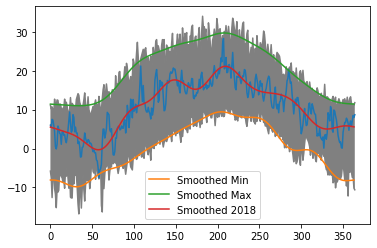

In [ ]:
import matplotlib.pyplot as plt

x1 = np.arange(365)
x2 = np.arange(364)
rft_min = np.fft.rfft(month_day(df_before_2018)[0])
rft_max = np.fft.rfft(month_day(df_before_2018)[1])
rft_mean = np.fft.rfft(df_2018.Tmean)
rft_min[5:] = 0 
rft_max[5:] = 0 
rft_mean[5:] = 0
y_smooth_min = np.fft.irfft(rft_min)
y_smooth_max = np.fft.irfft(rft_max)
y_smooth_mean = np.fft.irfft(rft_mean)

plt.plot(x1, month_day(df_before_2018)[0], color='gray')
plt.plot(x1, month_day(df_before_2018)[1], color='gray')
plt.plot(x1, df_2018.Tmean)
plt.plot(x2, smooth_data(month_day(df_before_2018)[0]), label='Smoothed Min')
plt.plot(x2, smooth_data(month_day(df_before_2018)[1]), label='Smoothed Max')
plt.plot(x2, smooth_data(df_2018.Tmean), label='Smoothed 2018')


plt.fill_between(x1, month_day(df_before_2018)[0], month_day(df_before_2018)[1],
                 facecolor="gray") # The fill color

plt.legend(loc=0)
plt.show()

---

<a name='4'></a>
## Part 5: Visualize the data

Plot the mean temperature of the year 2018. Create a shaded band with the ultimate minimum values and the ultimate maximum values from the multi-year dataset. Add labels, titles and legends. Use proper ranges. Be creative to make the plot attractive. 



<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<ul><li>use from bokeh.models import Band</li>
    <li>use ColumnDataSource to parse data arrays</li>
    <li>look for xaxis tick formatters</li>
</ul>
</details>

In [ ]:
from bokeh.io import output_notebook, curdoc
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot, column
from bokeh.models import Select, ColumnDataSource, Band, CheckboxGroup, Legend, LegendItem
from bokeh.models.widgets import Panel, Tabs
output_notebook()

Loading BokehJS ...

In [ ]:
p = figure(title= "Weather Data for Station 270", plot_width = 800, plot_height = 800 , x_range=(0,400), y_range=(0, 70))

source = ColumnDataSource({'days': np.arange(365), 'min': month_day(df_before_2018)[0] , 'max': month_day(df_before_2018)[1] , 'mean': df_2018.Tmean})
source2 = ColumnDataSource({'days': np.arange(364), 'smooth_min': smooth_data(month_day(df_before_2018)[0]), 'smooth_max': smooth_data(month_day(df_before_2018)[1]), 'smooth_mean': smooth_data(df_2018.Tmean)})

band = Band(base = 'days', lower = 'min' , upper='max', source=source, fill_color = 'gray')
p.add_layout(band)

p.line(x='days', y='mean', source=source, legend_label = 'Average Temp 2018')
p.line(x='days', y='smooth_mean', source=source2, legend_label = 'Smooth Avg temp 2018', color = 'red', alpha = 1.0)
p.line(x='days', y='smooth_min', source=source2, legend_label = 'Smooth min temp before 2018', color = 'hotpink', alpha = 1.0)
p.line(x='days', y='smooth_max', source=source2, legend_label = 'Smooth max temp before 2018', color = 'black', alpha = 1.0)

p.xaxis.axis_label = 'Days'
p.yaxis.axis_label = 'Temprature (In Degree Celcius)'
p.legend.click_policy="hide"


show(p)

---

<a name='5'></a>
## Part 6: Challenge

Make a widget in which you can select the year range for the multiyear set. Add this to your layout to make the plot interactive. Add another widget to select or deselect the smoother. Inspiration: https://demo.bokeh.org/weather